In [2]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import seaborn as sns
from pathlib import Path

## Load Data

In [4]:
data_file = Path("../data/processed_data/proccessed_data.csv")

data = pl.read_csv(data_file, try_parse_dates=True)
data.head()

county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,year,quarter,month,week,hour,day_of_year,day_of_month,day_of_week,eic_count_client,installed_capacity_client,data_block_id_client,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,data_block_id_gas,mean_price_per_mwh_24h_gas,forecast_date_ep,euros_per_mwh_24h_ep,data_block_id_ep,temperature_hw,dewpoint_hw,rain_hw,snowfall_hw,surface_pressure_hw,cloudcover_total_hw,cloudcover_low_hw,cloudcover_mid_hw,cloudcover_high_hw,windspeed_10m_hw,winddirection_10m_hw,shortwave_radiation_hw,direct_solar_radiation_hw,diffuse_radiation_hw,latitude_hw,longitude_hw,data_block_id_hw
i64,i64,i64,f64,i64,datetime[μs],i64,i64,i64,date,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,date,f64,f64,i64,f64,datetime[μs],f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,2021,3,9,35,0,244,1,3,108,952.89,2,2021-09-02,45.62,46.29,2,45.955,2021-09-02 00:00:00,96.99,2,13.815385,10.6,0.0,0.0,1011.569231,42.461538,44.153846,2.923077,3.384615,5.619658,341.384615,0.0,0.0,0.0,59.492308,24.584615,1.0
0,0,1,96.59,1,2021-09-01 00:00:00,0,1,0,2021-09-01,2021,3,9,35,0,244,1,3,108,952.89,2,2021-09-02,45.62,46.29,2,45.955,2021-09-02 00:00:00,96.99,2,13.815385,10.6,0.0,0.0,1011.569231,42.461538,44.153846,2.923077,3.384615,5.619658,341.384615,0.0,0.0,0.0,59.492308,24.584615,1.0
0,0,2,0.0,0,2021-09-01 00:00:00,0,2,1,2021-09-01,2021,3,9,35,0,244,1,3,17,166.4,2,2021-09-02,45.62,46.29,2,45.955,2021-09-02 00:00:00,96.99,2,13.815385,10.6,0.0,0.0,1011.569231,42.461538,44.153846,2.923077,3.384615,5.619658,341.384615,0.0,0.0,0.0,59.492308,24.584615,1.0
0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,2021,3,9,35,0,244,1,3,17,166.4,2,2021-09-02,45.62,46.29,2,45.955,2021-09-02 00:00:00,96.99,2,13.815385,10.6,0.0,0.0,1011.569231,42.461538,44.153846,2.923077,3.384615,5.619658,341.384615,0.0,0.0,0.0,59.492308,24.584615,1.0
0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,2021,3,9,35,0,244,1,3,688,7207.88,2,2021-09-02,45.62,46.29,2,45.955,2021-09-02 00:00:00,96.99,2,13.815385,10.6,0.0,0.0,1011.569231,42.461538,44.153846,2.923077,3.384615,5.619658,341.384615,0.0,0.0,0.0,59.492308,24.584615,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x720942de1f90>,
 'caps': [<matplotlib.lines.Line2D at 0x720942de2210>,
 'boxes': [<matplotlib.lines.Line2D at 0x720942de1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x720942de2490>],
 'fliers': [<matplotlib.lines.Line2D at 0x720942de25d0>],
 'means': []}

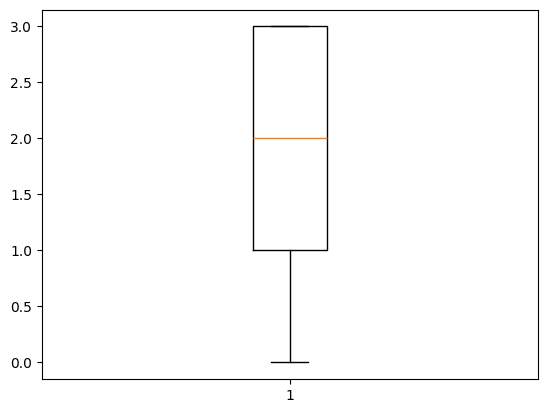

In [7]:
plt.boxplot(data["product_type"])